# TensorFlow and related libs import

In [143]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
import string
import numpy as np
import pandas as pd
import re

# Mounting Google Drive and loading data

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data source: 'https://www.azlyrics.com/b/bsb.html' 
"Backstreet Boys" (1995) Album

In [145]:
with open('/content/drive/My Drive/bsblyrics.txt') as f:
  lyrics=f.read()

# Data Cleaning

In [146]:
lyrics

"Everybody grove to the music\nEverybody jam\n\nOh, hey\n\nWe've been waiting so long\nJust can't hold it back no more\nCreepin' up and down now\nIt's time for me to let it go\nIf you really wanna see\nWhat we can do for you\nSend the crazy wildin' static\nSing it\n\n[Chorus:]\nJam on cuz Backstreet's got it\nCome on now everybody\nWe've got it goin' on for years\n[2x]\n\nWe've got it goin' on for years [2x]\n\nWell I'm creepin' up on your left\nStraight up funky when I get with you\nKeep it ruthless when I get wet\nKeep the party packed in my corner\nTough like granite to keep the crowd hype\nGet up on this just to get right\nWhat you want it what you gonna get\nBackstreet's got the special effects, uh\n\nIf you really wanna see\nWhat we can do for you, oh\nI'll send the crazy wildin' static\nSing it\n\n[Chorus]\n\nWe've got it goin' on for years [2x]\n\n[Bridge:]\nWe've been waiting so long\nJust can't hold it back no more\n(just can't hold it back no more)\nCreepin' up and down now\

In [147]:
lyrics=re.sub(r'\[.+\]',' ',lyrics)

In [148]:
lyrics

"Everybody grove to the music\nEverybody jam\n\nOh, hey\n\nWe've been waiting so long\nJust can't hold it back no more\nCreepin' up and down now\nIt's time for me to let it go\nIf you really wanna see\nWhat we can do for you\nSend the crazy wildin' static\nSing it\n\n \nJam on cuz Backstreet's got it\nCome on now everybody\nWe've got it goin' on for years\n \n\nWe've got it goin' on for years  \n\nWell I'm creepin' up on your left\nStraight up funky when I get with you\nKeep it ruthless when I get wet\nKeep the party packed in my corner\nTough like granite to keep the crowd hype\nGet up on this just to get right\nWhat you want it what you gonna get\nBackstreet's got the special effects, uh\n\nIf you really wanna see\nWhat we can do for you, oh\nI'll send the crazy wildin' static\nSing it\n\n \n\nWe've got it goin' on for years  \n\n \nWe've been waiting so long\nJust can't hold it back no more\n(just can't hold it back no more)\nCreepin' up and down now\nIt's time for me to let it go  

In [149]:
lyrics=lyrics.translate(str.maketrans('', '', string.punctuation))

In [150]:
lyrics

'Everybody grove to the music\nEverybody jam\n\nOh hey\n\nWeve been waiting so long\nJust cant hold it back no more\nCreepin up and down now\nIts time for me to let it go\nIf you really wanna see\nWhat we can do for you\nSend the crazy wildin static\nSing it\n\n \nJam on cuz Backstreets got it\nCome on now everybody\nWeve got it goin on for years\n \n\nWeve got it goin on for years  \n\nWell Im creepin up on your left\nStraight up funky when I get with you\nKeep it ruthless when I get wet\nKeep the party packed in my corner\nTough like granite to keep the crowd hype\nGet up on this just to get right\nWhat you want it what you gonna get\nBackstreets got the special effects uh\n\nIf you really wanna see\nWhat we can do for you oh\nIll send the crazy wildin static\nSing it\n\n \n\nWeve got it goin on for years  \n\n \nWeve been waiting so long\nJust cant hold it back no more\njust cant hold it back no more\nCreepin up and down now\nIts time for me to let it go  \n\nJam on jam on\n\nEveryb

In [151]:
lyrics = lyrics.lower()

In [152]:
lyrics

'everybody grove to the music\neverybody jam\n\noh hey\n\nweve been waiting so long\njust cant hold it back no more\ncreepin up and down now\nits time for me to let it go\nif you really wanna see\nwhat we can do for you\nsend the crazy wildin static\nsing it\n\n \njam on cuz backstreets got it\ncome on now everybody\nweve got it goin on for years\n \n\nweve got it goin on for years  \n\nwell im creepin up on your left\nstraight up funky when i get with you\nkeep it ruthless when i get wet\nkeep the party packed in my corner\ntough like granite to keep the crowd hype\nget up on this just to get right\nwhat you want it what you gonna get\nbackstreets got the special effects uh\n\nif you really wanna see\nwhat we can do for you oh\nill send the crazy wildin static\nsing it\n\n \n\nweve got it goin on for years  \n\n \nweve been waiting so long\njust cant hold it back no more\njust cant hold it back no more\ncreepin up and down now\nits time for me to let it go  \n\njam on jam on\n\neveryb

In [153]:
corpus = lyrics.split('\n')

In [154]:
#corpus

In [155]:
corpus=[corpus[i].rstrip() for i in range(len(corpus))]

In [156]:
#corpus

In [157]:
corpus = [i for i in corpus if i != '']

In [158]:
#corpus

# Sequence data preparation

Tokenizer function

In [159]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

Tokenizing the Corpus
(Max no of word selected=2000)

In [160]:
tokenizer = tokenize_corpus(corpus, num_words=2000)
total_words = tokenizer.num_words
print(total_words)

2000


In [161]:
tokenizer.num_words

2000

Sequence data building(sequence and padding)

In [162]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Bi-directional LSTM Neural Net Creation
Embedding dim=64

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=300, verbose=1)

Epoch 1/300
103/103 [==============================] - 1s 8ms/step - loss: 6.3722 - accuracy: 0.0462
Epoch 2/300
103/103 [==============================] - 1s 8ms/step - loss: 5.1946 - accuracy: 0.0563
Epoch 3/300
103/103 [==============================] - 1s 8ms/step - loss: 5.1026 - accuracy: 0.0563
Epoch 4/300
103/103 [==============================] - 1s 8ms/step - loss: 5.0150 - accuracy: 0.0563
Epoch 5/300
103/103 [==============================] - 1s 8ms/step - loss: 4.9385 - accuracy: 0.0563
Epoch 6/300
103/103 [==============================] - 1s 8ms/step - loss: 4.8796 - accuracy: 0.0572
Epoch 7/300
103/103 [==============================] - 1s 7ms/step - loss: 4.8301 - accuracy: 0.0673
Epoch 8/300
103/103 [==============================] - 1s 7ms/step - loss: 4.7924 - accuracy: 0.0692
Epoch 9/300
103/103 [==============================] - 1s 8ms/step - loss: 4.7549 - accuracy: 0.0683
Epoch 10/300
103/103 [==============================] - 1s 8ms/step - loss: 4.7215 - accura

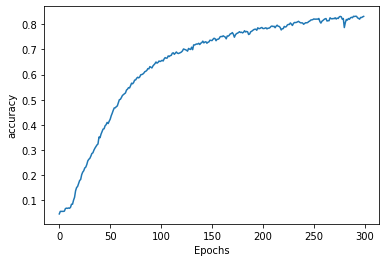

In [164]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

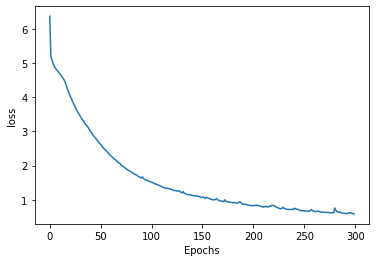

In [165]:
plot_graphs(history, 'loss')

# Three types of predictive text generation

In [166]:
#1: prediction using argmax

In [180]:
seed_text = "everybody groove to the music"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

everybody groove to the music we sorry too soon lead me free apart give give asked honey policy shake shake shake it shake it shake it baby shake it baby tell oh baby youre oh youre around oh me free right apart you eat only nobody this party playin playin else from life give my heart whatcha gotta shouldve must gotta see all all give gotta left callin from from life else life hang air without you heart with you hold it closer closer asked me all you start all wildin feelings show heart plan missin little nobody this party show playin party swear goin


In [170]:
#2: Taking random words from 2000 words

In [186]:
# Use this process for the full output generation
seed_text = "everybody groove to the music"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = model.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

everybody groove to the music we everynight fine come easy back time back time dance but you party its hear the days hang floor oh it baby wih give you once everybody everybody everybody swing baby hey baby youd too soon oh shut give give this overdrive their my heart heart comin help nobody from love from you you talk delusion you swing yeah boys i gotta hold anymore miss had very smiling man fine down touch used comin dance from give tearin life things ecstasy movin from the light is floor so days swear as tear as stop hit playin take playin playin playin


In [172]:
#3: Taking random words among top 100 predicted words and not 2000

In [188]:
seed_text = "everybody groove to the music"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  #predicted_probs = model.predict(token_list)[0]
  prediction= model.predict(token_list)
  pred_list=prediction[0].tolist()
  dic={}
  for i,element in enumerate(pred_list):
    dic[i]=element
  dic_sort=sorted(dic.items(),key=lambda x:x[1],reverse=True)
  final_list=[i[0] for i in dic_sort[:100]]
  predicted=np.random.choice(final_list)
  # predicted = np.random.choice([x for x in range(len(predicted_probs))],
  #                              p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

everybody groove to the music sure a gave long thing you through lookin keep you cared always known the beep fadin ill their but wildin show dream bein top call shared back bodys wont still seems trust listen head used used right back pain can do much much right granted tell no where bodys dream matter send way life callin in hold talk the one a fools music nowhere day first might understand special static there playin cuz can up tonight so everything time cinderella youre at cinderella walked other as movin prove hang asked leave whatcha or hesitate we destiny hang tree hype everybody


In [190]:
# just for experiment

In [174]:
# Tokenizer explored

In [175]:
# tokenizer.word_index.items()

dict_items([('you', 1), ('i', 2), ('to', 3), ('it', 4), ('oh', 5), ('with', 6), ('the', 7), ('roll', 8), ('ooh', 9), ('me', 10), ('my', 11), ('be', 12), ('just', 13), ('and', 14), ('but', 15), ('know', 16), ('for', 17), ('heart', 18), ('baby', 19), ('a', 20), ('do', 21), ('wanna', 22), ('all', 23), ('got', 24), ('everybody', 25), ('your', 26), ('youve', 27), ('na', 28), ('is', 29), ('party', 30), ('so', 31), ('boys', 32), ('its', 33), ('girl', 34), ('nobody', 35), ('youre', 36), ('close', 37), ('on', 38), ('one', 39), ('love', 40), ('never', 41), ('get', 42), ('that', 43), ('yeah', 44), ('what', 45), ('im', 46), ('like', 47), ('want', 48), ('make', 49), ('in', 50), ('will', 51), ('dont', 52), ('back', 53), ('no', 54), ('can', 55), ('ill', 56), ('have', 57), ('now', 58), ('gonna', 59), ('playin', 60), ('games', 61), ('see', 62), ('come', 63), ('give', 64), ('quit', 65), ('lets', 66), ('cant', 67), ('go', 68), ('when', 69), ('gotta', 70), ('else', 71), ('where', 72), ('at', 73), ('time',

In [176]:
# len(tokenizer.word_index.keys())

512

In [177]:
# token='wont'

In [178]:
# if token in tokenizer.word_index.keys():
#   print(tokenizer.word_index[token])

240


In [179]:
# len(tokenizer.word_counts)

512